In [355]:
import pandas as pd
import os
from datetime import datetime
import sqlite3
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# download qgis
# real-time 911 - location
# null values in Force in the location areas



In [3]:
#county = pd.read_csv("/Users/sarahburgart/galvanize/week7/capstone2/RDC_InventoryCoreMetrics_County_sfh.csv")

In [4]:
#historical = pd.read_csv("/Users/sarahburgart/galvanize/week7/capstone2/RDC_InventoryCoreMetrics_US_Hist.csv")

In [5]:
#saletolist = pd.read_csv("/Users/sarahburgart/galvanize/week7/capstone2/SaleToListRatio_State.csv")

In [6]:
#from os import listdir
#filelist = [f for f in os.listdir('data') if f.endswith('.csv')]
#filelist
#df = pd.read_csv(f"data/{filelist[0]}")
#lst = [f"{col}{filelist[0][:6]}" for col in df.columns]
#df.columns = lst
#df.head()
#df3 = pd.read_csv(f"data/{filelist[1]}")

In [9]:
'''for file in filelist[1:]:
    #print(f"{file}")
    pd.concat([df, pd.read_csv(f"data/{file}")], axis=1)
    lst = [f"{col}{filelist[0][:6]}" for col in df.columns]
    df.columns = lst'''

'for file in filelist[1:]:\n    #print(f"{file}")\n    pd.concat([df, pd.read_csv(f"data/{file}")], axis=1)\n    lst = [f"{col}{filelist[0][:6]}" for col in df.columns]\n    df.columns = lst'

In [2]:
# function to convert datetime object to 4 - for force ONLY
def datetime(df, col_as_str):
    yearmonthday = df[col_as_str].astype(str).str.split(" ")
    ymd = yearmonthday.apply(lambda x: x[0]).str.split("/")
    year = ymd.apply(lambda x: x[2])
    month = ymd.apply(lambda x: x[0])
    day = ymd.apply(lambda x: x[1])
    time = ymd = yearmonthday.apply(lambda x: x[1]+x[2]).astype(str)
    df["year"] = year
    df["month"] = month
    df["day"] = day
    df["time"] = time
    return df


In [3]:
def callstime(df, col_arrive):
    yearmonthday = df[col_arrive].astype(str).str.split(" ")
    df["year"] = yearmonthday.apply(lambda x: x[2])
    df["day"] = yearmonthday.apply(lambda x: x[1])
    month_dict = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec":12}
    df["month"] = yearmonthday.apply(lambda x: month_dict[x[0]])
    df["time"] = yearmonthday.apply(lambda x: x[3])
    return df
    
    

In [4]:
calls = pd.read_csv("/Users/sarahburgart/galvanize/week7/capstone2/data/Call_Data.csv")

In [5]:
force = pd.read_csv("/Users/sarahburgart/galvanize/week7/capstone2/data/Use_Of_Force.csv")

In [6]:
beats = pd.read_csv("/Users/sarahburgart/galvanize/week7/capstone2/data/Seattle_Police_Department_Beats.csv")

In [17]:
force = datetime(force,"Occured_date_time" )


In [9]:
foo = pd.to_datetime( force.Occured_date_time )
epoch_second = foo.map(lambda x:x.value/1e9)

In [10]:
force["epoch"] = epoch_second

In [12]:
calls = callstime(calls,"Arrived Time")


In [13]:
calls17 = calls[calls["year"].isin(["2014", "2015", "2016", "2017", "2018", "2019"])]

In [14]:
bar = pd.to_datetime( calls17["Arrived Time"], format="%b %d %Y %I:%M:%S:%f%p" )
epoch_second2 = bar.map(lambda x: x.value/1e9)

In [15]:
calls17["epoch_calls"] = epoch_second2

/Users/sarahburgart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
# remove repetitive columns

calls_tosql = calls17.drop(columns =["year","day", "month", "time", "Precinct", "Sector", "Arrived Time"])
calls_tosql.set_index("epoch_calls", inplace=True)


In [29]:
# remove repetitive columns (incident type, officer id and subject id are in ID respectively)

force_sql = force.drop(columns=["Occured_date_time", "year", "month", "day","time", "Incident_Num", "Officer_ID",
                               "Subject_ID"])


In [80]:
# create engine
cnx = sqlite3.connect('/Users/sarahburgart/galvanize/week7/capstone2/calls.sqlite')

In [85]:
# move calls to sqlite table
calls_tosql.to_sql("log", con=cnx, index=True)


In [56]:
calls_tosql.head()

,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Beat
epoch_calls,,,,,,,,
1.389370e+09,2014000010473,ASSISTANCE RENDERED,ONVIEW,9,OFF DUTY EMPLOYMENT,-OFF DUTY EMPLOYMENT,01/10/2014 04:02:48 PM,M3
1.389370e+09,2014000010474,ASSISTANCE RENDERED,ONVIEW,9,OFF DUTY EMPLOYMENT,-OFF DUTY EMPLOYMENT,01/10/2014 04:03:51 PM,M1
1.389414e+09,2014000011094,ASSISTANCE RENDERED,ONVIEW,4,REQUEST TO WATCH,REQUEST TO WATCH,01/11/2014 04:23:57 AM,K2
1.389430e+09,2014000011246,ASSISTANCE RENDERED,ONVIEW,9,OFF DUTY EMPLOYMENT,-OFF DUTY EMPLOYMENT,01/11/2014 08:43:16 AM,M3
1.389631e+09,2014000013754,ASSISTANCE RENDERED,ONVIEW,9,OFF DUTY EMPLOYMENT,-OFF DUTY EMPLOYMENT,01/13/2014 04:28:49 PM,M1


In [81]:
# create cursor
cur = cnx.cursor()


In [124]:
test = cur.execute("SELECT * from log LIMIT 10").fetchall()
for row in test:
    print(row)

cnx.commit()

(1389369768.0, 2014000010473, 'ASSISTANCE RENDERED', 'ONVIEW', 9, 'OFF DUTY EMPLOYMENT', '-OFF DUTY EMPLOYMENT', '01/10/2014 04:02:48 PM', 'M3')
(1389369831.0, 2014000010474, 'ASSISTANCE RENDERED', 'ONVIEW', 9, 'OFF DUTY EMPLOYMENT', '-OFF DUTY EMPLOYMENT', '01/10/2014 04:03:51 PM', 'M1')
(1389414237.0, 2014000011094, 'ASSISTANCE RENDERED', 'ONVIEW', 4, 'REQUEST TO WATCH', 'REQUEST TO WATCH', '01/11/2014 04:23:57 AM', 'K2')
(1389429796.0, 2014000011246, 'ASSISTANCE RENDERED', 'ONVIEW', 9, 'OFF DUTY EMPLOYMENT', '-OFF DUTY EMPLOYMENT', '01/11/2014 08:43:16 AM', 'M3')
(1389630529.0, 2014000013754, 'ASSISTANCE RENDERED', 'ONVIEW', 9, 'OFF DUTY EMPLOYMENT', '-OFF DUTY EMPLOYMENT', '01/13/2014 04:28:49 PM', 'M1')
(1389631222.0, 2014000013755, 'REPORT WRITTEN (NO ARREST)', '911', 2, 'SHOPLIFT - THEFT', '--THEFT - SHOPLIFT', '01/13/2014 04:28:54 PM', 'K2')
(1389677005.0, 2014000014333, 'OTHER REPORT MADE', 'ONVIEW', 3, 'FOLLOW UP', '--WARRANT SERVICES - FELONY', '01/14/2014 05:23:25 AM', 'D2'

In [90]:
cur.execute("CREATE INDEX index_name ON log (epoch_calls)")

In [160]:
# testing index
test_i = cur.execute("select * from log where epoch_calls > 1511833200.0 limit 10").fetchall()
cnx.commit()

print(test_i)
# 1389369768.0

[(1511833270.0, 2017000438602, 'ORAL WARNING GIVEN', 'ONVIEW', 7, 'TRAFFIC STOP - OFFICER INITIATED ONVIEW', '--TRAFFIC - MOVING VIOLATION', '11/28/2017 01:41:10 AM', 'C3'), (1511833290.0, 2017000438599, 'ORAL WARNING GIVEN', '911', 2, 'DISTURBANCE, MISCELLANEOUS/OTHER', '--DISTURBANCE - OTHER', '11/28/2017 01:34:37 AM', 'D1'), (1511833452.0, 2017000438604, 'ASSISTANCE RENDERED', 'ONVIEW', 3, 'DISTURBANCE, MISCELLANEOUS/OTHER', '--DISTURBANCE - OTHER', '11/28/2017 01:44:11 AM', 'N3'), (1511833619.0, 2017000438605, 'PHYSICAL ARREST MADE', 'ONVIEW', 7, 'FOOT - ELUDING POLICE', '--WARRANT SERVICES - FELONY', '11/28/2017 01:46:58 AM', 'M2'), (1511834149.0, 2017000438603, 'ASSISTANCE RENDERED', 'TELEPHONE OTHER, NOT 911', 3, 'SUSPICIOUS PERSON, VEHICLE OR INCIDENT', '--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON', '11/28/2017 01:43:52 AM', 'S2'), (1511834189.0, 2017000438606, 'CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)', 'ONVIEW', 7, 'TRAFFIC STOP - OFFICER INITIATED ONVIEW', '--TRAFFIC - MOVING

In [282]:
force10 = force.head(5)
new_df = pd.DataFrame(force10.iterrows())

#force.drop(columns=["Incident_Num", "Occured_date_time", "Officer_ID", "Subject_ID"], inplace=True)
sum(force[force.Beat == "-"].count()), len(force)

(5824, 9838)

In [291]:
# iterate through the dataframe 'force', make a bunch of new rows, and then make a dataframe out of those

new_row = []
#val_lst = []
for ix, row in force.iterrows():
    # query the 911 calls database
    # for each call, append to a bunch of records that we're building up into a dataframe
    value = row.epoch
    rowbeat = row.Beat
    vals = cur.execute(f"select * from log where epoch_calls BETWEEN ({value} - 1200) AND {value} ").fetchall()
    #val_lst.extend([value, val[0]])
    cnx.commit()
    
    for val in vals:
        new_row.extend( [[ix,  val[0], row.epoch, row.ID, val[1], val[2],
                        row.Incident_Type, row.Precinct, 
                        row.Sector, row.Beat, val[8], val[4],
                        row.Subject_Race, row.Subject_Gender, val[3], val[5], val[6], 
                        val[7], row.year, row.month, row.day, row.time] ])
  

In [295]:
merged = pd.DataFrame(new_row, columns=["index","call_epoch", "force_epoch", "ID", "CAD_Event_Number", "Event_Clearance_Description",
                                "Force_Level", "Precinct", 
                                "Sector", "force_beat", "calls_beat", "Priority",
                                "Subject_Race", "Subject_Gender","Call_Type", "Initial_Call_Type", "Final_Call_Type",
                                "Original_Time_Queued", "year", "month","day", "time " ])



In [224]:
lst = []
for value in list(force.iloc[:2,:].epoch.values):
    val = cur.execute(f"select * from log where epoch_calls BETWEEN ({value} - 14400) AND {value} limit 1").fetchall()
    lst.append(val)
cnx.commit()

# 4 hours = 14400 seconds

In [313]:
force3 = merged[merged.Force_Level == "Level 3 - Use of Force"]
force2 = merged[merged.Force_Level == "Level 2 - Use of Force"]
force1 = merged[merged.Force_Level == "Level 1 - Use of Force"]

In [314]:
len(force3), len(force2), len(force1)

(1217, 23921, 83761)

TypeError: 'list' object is not callable

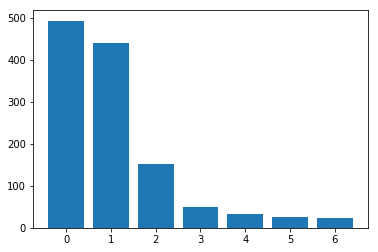

In [373]:
x = force3.Subject_Race.value_counts()
plt.bar(np.arange(7), list(x.values))

plt.xticks([1, 2, 3,4,5,6,7], ['mon', 'tue', 'wed','c','b','f','g'])
plt.show()

In [317]:
merged.Subject_Race.value_counts()

White                            44844
Black or African American        36158
Not Specified                    18356
Hispanic or Latino                4344
Asian                             3904
American Indian/Alaska Native     1217
Nat Hawaiian/Oth Pac Islander      703
Name: Subject_Race, dtype: int64

In [361]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [362]:
xlabels

array(['White', 'Black or African American', 'Not Specified',
       'American Indian/Alaska Native', 'Nat Hawaiian/Oth Pac Islander',
       'Asian', 'Hispanic or Latino'], dtype=object)